In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.models import Model
from keras.layers import Dense
from keras.optimizers import Adam
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers import Dropout
from keras.utils.np_utils import to_categorical
import random


In [ ]:
(X_train, y_train), (X_test, y_test)= mnist.load_data()
 
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [ ]:
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels."
assert(X_train.shape[1:] == (28,28)), "The dimensions of the images are not 28 x 28."
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the number of labels."
assert(X_test.shape[1:] == (28,28)), "The dimensions of the images are not 28 x 28."
 

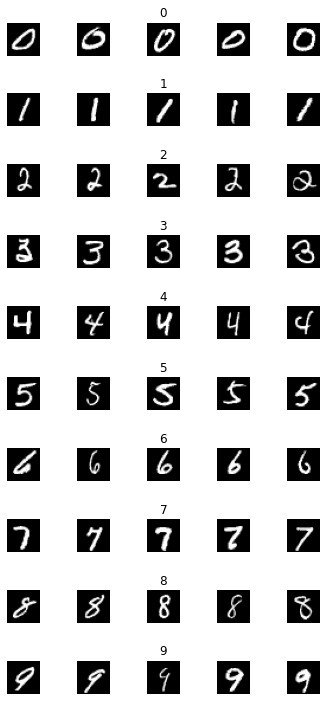

In [ ]:
num_of_samples=[]
 
cols = 5
num_classes = 10
 
fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5,10))
fig.tight_layout()
 
for i in range(cols):
    for j in range(num_classes):
      x_selected = X_train[y_train == j]
      axs[j][i].imshow(x_selected[random.randint(0,(len(x_selected) - 1)), :, :], cmap=plt.get_cmap('gray'))
      axs[j][i].axis("off")
      if i == 2:
        axs[j][i].set_title(str(j))
        num_of_samples.append(len(x_selected))

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


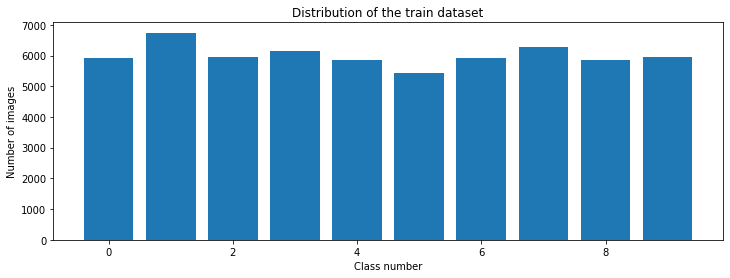

In [ ]:
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the train dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()

In [ ]:
X_train = X_train.reshape(60000, 28, 28, 1) # this data will not be flatten like MNIST
X_test = X_test.reshape(10000, 28, 28, 1)

In [ ]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
 
X_train = X_train/255
X_test = X_test/255

In [ ]:
# define the leNet_model function
def leNet_model():
  model = Sequential()
  model.add(Conv2D(30,(5,5), input_shape=(28, 28, 1), activation='relu', strides=1 , padding='valid' ))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Conv2D(15,(3,3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Flatten())
  model.add(Dense(500, activation = 'relu')) 
  model.add(Dropout(0.5))
  model.add(Dense(num_classes, activation = 'softmax'))
  model.compile(Adam(learning_rate=0.01), loss = 'categorical_crossentropy', metrics=['accuracy'])
  return model 

In [ ]:
model = leNet_model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 24, 24, 30)        780       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 30)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 15)        4065      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 15)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 375)               0         
                                                                 
 dense_2 (Dense)             (None, 500)              

In [ ]:
history = model.fit(X_train, y_train, epochs = 10, validation_split = 0.1, batch_size = 400, verbose = 1, shuffle = 1)

Epoch 1/10
135/135 [==============================] - 2s 9ms/step - loss: 0.2383 - accuracy: 0.9258 - val_loss: 0.0477 - val_accuracy: 0.9862
Epoch 2/10
135/135 [==============================] - 1s 7ms/step - loss: 0.0670 - accuracy: 0.9796 - val_loss: 0.0485 - val_accuracy: 0.9855
Epoch 3/10
135/135 [==============================] - 1s 7ms/step - loss: 0.0561 - accuracy: 0.9823 - val_loss: 0.0360 - val_accuracy: 0.9890
Epoch 4/10
135/135 [==============================] - 1s 7ms/step - loss: 0.0477 - accuracy: 0.9854 - val_loss: 0.0423 - val_accuracy: 0.9887
Epoch 5/10
135/135 [==============================] - 1s 7ms/step - loss: 0.0445 - accuracy: 0.9866 - val_loss: 0.0510 - val_accuracy: 0.9865
Epoch 6/10
135/135 [==============================] - 1s 6ms/step - loss: 0.0418 - accuracy: 0.9869 - val_loss: 0.0431 - val_accuracy: 0.9880
Epoch 7/10
135/135 [==============================] - 1s 7ms/step - loss: 0.0375 - accuracy: 0.9884 - val_loss: 0.0422 - val_accuracy: 0.9887
Epoch 

Text(0.5, 0, 'epoch')

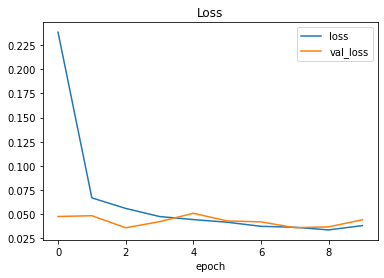

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss','val_loss'])
plt.title('Loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

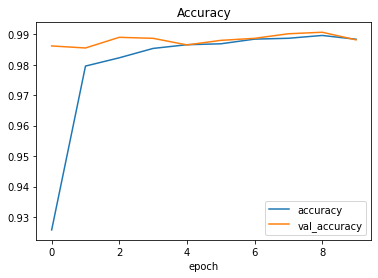

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy','val_accuracy'])
plt.title('Accuracy')
plt.xlabel('epoch')

<Response [200]>


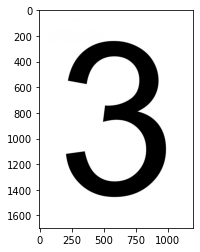

In [ ]:
import requests 
from PIL import Image
url = 'https://printables.space/files/uploads/download-and-print/large-printable-numbers/3-a4-1200x1697.jpg' # for 3
#url = 'https://colah.github.io/posts/2014-10-Visualizing-MNIST/img/mnist_pca/MNIST-p1815-4.png' # for 2
response = requests.get(url, stream = True)
print(response)
img = Image.open(response.raw)
plt.imshow(img)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   1   1   1   0   0   0   1   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   1   0   1   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 255 255 255 255 255 255 255   4
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 255 255 255 255 255 255 255 255 255 255
  255 189   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 255 255 255 255   0   0   0   0   0 249 255
  255 255 255   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255   0   0   0   0   0   0   0   0
  255 255 255   0   0   0   0   0   0   0]
 [  0   0   0   0   0 253 255 255 255   0   0   0   0   0   0   

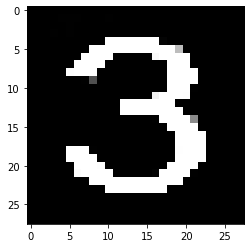

In [ ]:
import cv2
img_array = np.asarray(img)
resized = cv2.resize(img_array,(28,28)) # resizing image to 28x28 pixels. 
gray_scale = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
image = cv2.bitwise_not(gray_scale)
plt.imshow(image, cmap=plt.get_cmap("gray"))
print(image)

In [ ]:

image = image/255
image = image.reshape(1, 28,28,1)

In [ ]:
prediction =  np.argmax(model.predict(image), axis=-1)
print("Predicted digit:",str(prediction))

1/1 [==============================] - 0s 84ms/step
Predicted digit: [3]


In [ ]:
# for test data
score = model.evaluate(X_test, y_test, verbose = 0)
print("Test score:", score[0])
print("Test accuracy:", score[1])

Test score: 0.04534678906202316
Test accuracy: 0.9883000254631042


In [ ]:
# Visualizing images in convolution layers using Model class API

'''
layer1 = Model(inputs=model.layers[0].input, outputs=model.layers[0].output)
layer2 = Model(inputs=model.layers[0].input, outputs=model.layers[2].output)
 
visual_layer1, visual_layer2 = layer1.predict(img), layer2.predict(img)
'''

# API not working 

'\nlayer1 = Model(inputs=model.layers[0].input, outputs=model.layers[0].output)\nlayer2 = Model(inputs=model.layers[0].input, outputs=model.layers[2].output)\n \nvisual_layer1, visual_layer2 = layer1.predict(img), layer2.predict(img)\n'